In [1]:
import basedosdados as bd
import pandas as pd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_ibge_populacao',
table_id='municipio',
billing_project_id="projeto-buda")

Downloading: 100%|████████████████████████████████████████████████████████| 174388/174388 [00:08<00:00, 19933.94rows/s]


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [3]:
df.head()

,ano,sigla_uf,id_municipio,populacao
0,1991,RO,1100015,31981
1,1992,RO,1100015,34768
2,1993,RO,1100015,37036
3,1994,RO,1100015,39325
4,1995,RO,1100015,41574


In [4]:
df.isnull().sum()

ano               0
sigla_uf          1
id_municipio      1
populacao       534
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173853 entries, 0 to 174386
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ano           173853 non-null  Int64 
 1   sigla_uf      173853 non-null  object
 2   id_municipio  173853 non-null  object
 3   populacao     173853 non-null  Int64 
dtypes: Int64(2), object(2)
memory usage: 7.0+ MB


In [26]:
populacao_por_ano = df.groupby('ano')['populacao'].sum().reset_index()

populacao_por_ano['populacao'] = round(populacao_por_ano['populacao'] / 1000000, 2)

populacao_por_ano['populacao'] = populacao_por_ano['populacao']

populacao_por_ano.head()

,ano,populacao
0,1991,146.82
1,1992,149.24
2,1993,151.57
3,1994,153.73
4,1995,155.82


In [8]:
type(populacao_por_ano)

pandas.core.frame.DataFrame

In [35]:
#transoformando o dataframe em serie temporal por ano e a população do país todo
serie_temporal_anual_pais = populacao_por_ano.set_index('ano')['populacao']

serie_temporal_anual_pais

ano
1991    146.82
1992    149.24
1993    151.57
1994    153.73
1995    155.82
1996    157.07
1997    159.64
1998    161.79
1999    163.95
2000    169.87
2001    172.39
2002    174.63
2003    176.87
2004    181.58
2005    184.18
2006    186.77
2007    184.01
2008    189.61
2009    191.45
2010    190.76
2011    192.37
2012    193.95
2013    201.03
2014    202.77
2015    204.45
2016    206.08
2017    207.66
2018    208.49
2019    210.15
2020    211.76
2021    213.32
2022     207.8
Name: populacao, dtype: Float64

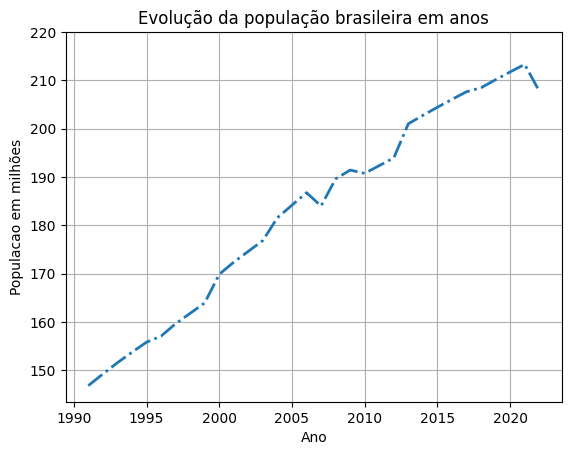

In [36]:
ax = plt.plot(serie_temporal_anual_pais, linestyle = '-.', linewidth = 2)
plt.title('Evolução da população brasileira em anos')
plt.ylabel('Populacao em milhões')
plt.xlabel('Ano')
plt.ylim(top = 220)
plt.grid()
plt.show()

In [37]:
#smoothing_level entre 0 e 1. Valores mais perto de 1 significa que damos mais importancia aos valores mais recentes.
modelo04 = SimpleExpSmoothing(serie_temporal_anual_pais)
modelo04_ajustado = modelo04.fit(smoothing_level=0.4)
suavizacao04 = modelo04_ajustado.fittedvalues

modelo06 = SimpleExpSmoothing(serie_temporal_anual_pais)
modelo06_ajustado = modelo06.fit(smoothing_level=0.6)
suavizacao06 = modelo06.fittedvalues

modelo08 = SimpleExpSmoothing(serie_temporal_anual_pais)
modelo08 = modelo08.fit(smoothing_level=0.8)
suavizacao08 = modelo08.fittedvalues

suavizacao04

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

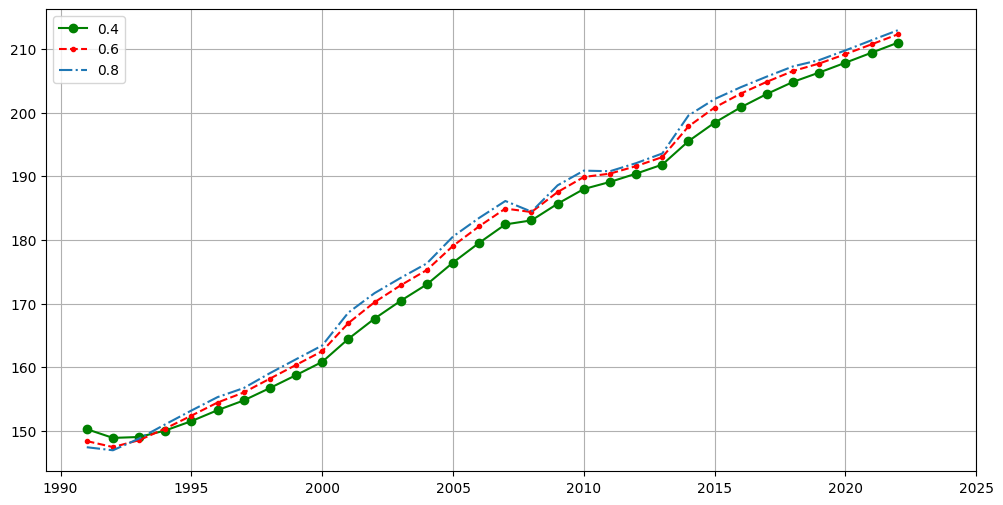

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(suavizacao04, 'go-', label = '0.4')
plt.plot(suavizacao06, 'r.--', label = '0.6')
plt.plot(suavizacao08, '-.', label = '0.8')
plt.legend()
plt.grid()
plt.xlim(right = 2025)
plt.show()

In [13]:
#previsões

numero_previsoes = 1
previsao04 = suavizacao04.forecast(steps = numero_previsoes)
previsao06 = suavizacao06.forecast(steps = numero_previsoes)
previsao08 = suavizacao08.forecast(steps = numero_previsoes)

type(previsao04)

AttributeError: 'Series' object has no attribute 'forecast'